1. **Importing Required Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

2. **Loading and Preparing the Data**

In [2]:
# importing whole Dataset
df = pd.read_csv("stock_market_dt.csv")
df = df.iloc[: , 1:]
df.shape

(1243, 38)

In [3]:
# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1243 entries, 0 to 1242
Data columns (total 38 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               1243 non-null   datetime64[ns]
 1   Natural_Gas_Price  1243 non-null   float64       
 2   Natural_Gas_Vol.   1239 non-null   float64       
 3   Crude_oil_Price    1243 non-null   float64       
 4   Crude_oil_Vol.     1220 non-null   float64       
 5   Copper_Price       1243 non-null   float64       
 6   Copper_Vol.        1206 non-null   float64       
 7   Bitcoin_Price      1243 non-null   object        
 8   Bitcoin_Vol.       1243 non-null   float64       
 9   Platinum_Price     1243 non-null   object        
 10  Platinum_Vol.      636 non-null    float64       
 11  Ethereum_Price     1243 non-null   object        
 12  Ethereum_Vol.      1243 non-null   float64       
 13  S&P_500_Price      1243 non-null   object        
 14  Nasdaq_1

In [5]:
df.head()

,Date,Natural_Gas_Price,Natural_Gas_Vol.,Crude_oil_Price,Crude_oil_Vol.,Copper_Price,Copper_Vol.,Bitcoin_Price,Bitcoin_Vol.,Platinum_Price,...,Berkshire_Price,Berkshire_Vol.,Netflix_Price,Netflix_Vol.,Amazon_Price,Amazon_Vol.,Meta_Price,Meta_Vol.,Gold_Price,Gold_Vol.
0,2024-02-02,2.079,NaN,72.28,NaN,3.8215,NaN,"43,194.70",42650.0,901.6,...,"5,89,498",10580.0,564.64,4030000.0,171.81,117220000.0,474.99,84710000.0,"2,053.70",NaN
1,2024-02-01,2.050,161340.0,73.82,577940.0,3.8535,NaN,"43,081.40",47690.0,922.3,...,"5,81,600",9780.0,567.51,3150000.0,159.28,66360000.0,394.78,25140000.0,"2,071.10",260920.0
2,2024-01-31,2.100,142860.0,75.85,344490.0,3.9060,NaN,"42,580.50",56480.0,932.6,...,"5,78,020",9720.0,564.11,4830000.0,155.20,49690000.0,390.14,20010000.0,"2,067.40",238370.0
3,2024-01-30,2.077,139750.0,77.82,347240.0,3.9110,NaN,"42,946.20",55130.0,931.7,...,"5,84,680",9750.0,562.85,6120000.0,159.00,42290000.0,400.06,18610000.0,"2,050.90",214590.0
4,2024-01-29,2.490,3590.0,76.78,331930.0,3.8790,NaN,"43,299.80",45230.0,938.3,...,"5,78,800",13850.0,575.79,6880000.0,161.26,42840000.0,401.02,17790000.0,"2,034.90",1780.0


3. **Sepearating the Amazon Data from the dataset**

In [6]:
# Load and prepare the data
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
amazon_db = df[["Date", "Amazon_Price", "Amazon_Vol."]]


4. **Exploratory Data Analysis (EDA)**

In [7]:
amazon_db.dtypes

Date            datetime64[ns]
Amazon_Price           float64
Amazon_Vol.            float64
dtype: object

In [8]:
amazon_db.nunique()

Date            1243
Amazon_Price    1144
Amazon_Vol.     1148
dtype: int64

In [9]:
amazon_db.head()

,Date,Amazon_Price,Amazon_Vol.
0,2024-02-02,171.81,117220000.0
1,2024-02-01,159.28,66360000.0
2,2024-01-31,155.20,49690000.0
3,2024-01-30,159.00,42290000.0
4,2024-01-29,161.26,42840000.0


In [10]:
amazon_db.tail()

,Date,Amazon_Price,Amazon_Vol.
1238,2019-02-08,79.41,113150000.0
1239,2019-02-07,80.72,92530000.0
1240,2019-02-06,82.01,78800000.0
1241,2019-02-05,82.94,89060000.0
1242,2019-02-04,81.67,98580000.0


In [11]:
amazon_db.isnull().sum()

Date            0
Amazon_Price    0
Amazon_Vol.     0
dtype: int64

In [12]:
amazon_db.describe()

,Date,Amazon_Price,Amazon_Vol.
count,1243,1243.000000,1.243000e+03
mean,2021-08-02 10:03:34.320193024,128.683234,7.413005e+07
min,2019-02-04 00:00:00,79.410000,1.763000e+07
25%,2020-04-28 12:00:00,96.260000,5.264500e+07
50%,2021-08-03 00:00:00,128.730000,6.520000e+07
75%,2022-11-05 12:00:00,158.110000,8.674500e+07
max,2024-02-02 00:00:00,186.570000,3.113500e+08
std,NaN,30.808631,3.245753e+07


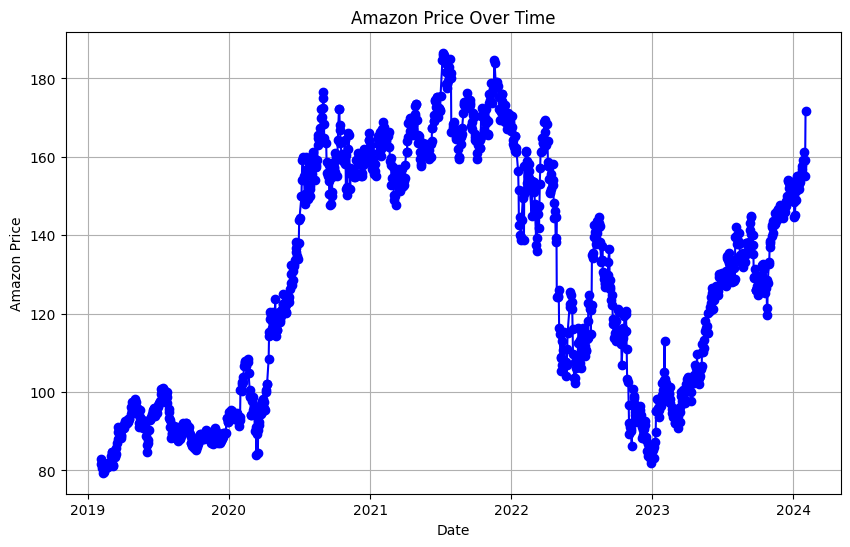

In [13]:
# Exploratory Data Analysis
plt.figure(figsize=(10, 6))
plt.plot(amazon_db['Date'], amazon_db['Amazon_Price'], label='Amazon Price', color='blue', marker='o')
plt.xlabel('Date')
plt.ylabel('Amazon Price')
plt.title('Amazon Price Over Time')
plt.grid(True)
plt.show()

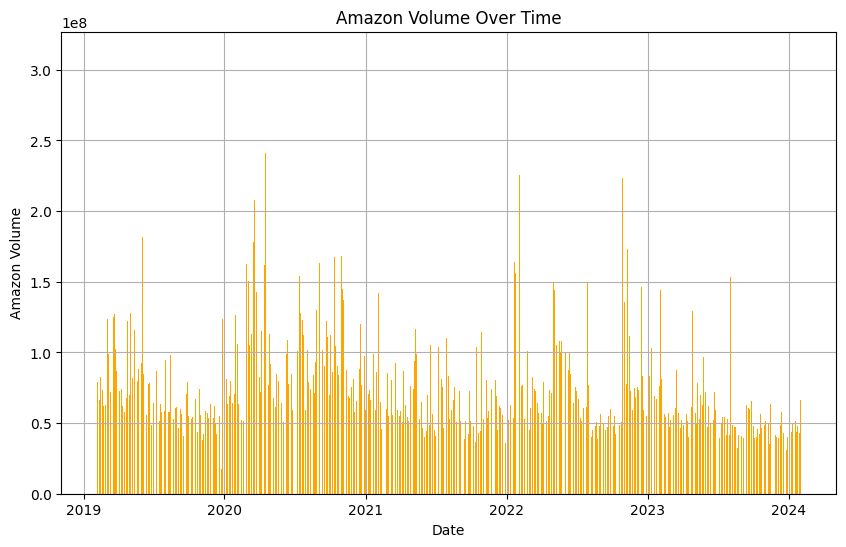

In [14]:
# Bar plot for Amazon_Vol.
plt.figure(figsize=(10, 6))
plt.bar(amazon_db['Date'], amazon_db['Amazon_Vol.'], label='Amazon Volume', color='orange')
plt.xlabel('Date')
plt.ylabel('Amazon Volume')
plt.title('Amazon Volume Over Time')
plt.grid(True)
plt.show()

In [15]:
print(amazon_db[['Amazon_Price', 'Amazon_Vol.']].corr())

              Amazon_Price  Amazon_Vol.
Amazon_Price      1.000000    -0.088988
Amazon_Vol.      -0.088988     1.000000


5. **Feature Engineering: Adding Date-Based Features**

In [16]:
# Feature Engineering: Add date-based features
amazon_db['Day_of_Week'] = amazon_db['Date'].dt.dayofweek
amazon_db['Month'] = amazon_db['Date'].dt.month

/tmp/ipykernel_9325/3256886592.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amazon_db['Day_of_Week'] = amazon_db['Date'].dt.dayofweek
/tmp/ipykernel_9325/3256886592.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amazon_db['Month'] = amazon_db['Date'].dt.month


6. **Normalizing Volume Data**

In [17]:
# Normalize the volume
scaler = StandardScaler()
amazon_db['Normalized_Vol'] = scaler.fit_transform(amazon_db[['Amazon_Vol.']])

/tmp/ipykernel_9325/797904383.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amazon_db['Normalized_Vol'] = scaler.fit_transform(amazon_db[['Amazon_Vol.']])


7. **Defining Features and Target Variable**

In [18]:
# Features and target
X = amazon_db[['Normalized_Vol', 'Day_of_Week', 'Month']]  # Including new features
y = amazon_db['Amazon_Price']

8. **Splitting Data into Training and Testing Sets**

In [19]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


9. **Initializing and Training the Linear Regression Model**

In [20]:
# Initialize and train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

10. **Model Evaluation**

In [21]:
# Predict the target on test data
y_pred = model.predict(X_test)

# Model evaluation
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")


11. **Cross-Validation with Mean Squared Error (MSE)**

In [23]:
# Cross-validation with MSE
cv_scores_mse = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
mse_scores = -cv_scores_mse
mean_mse = mse_scores.mean()
std_mse = mse_scores.std()

print(f"Mean MSE from 5-Fold Cross-Validation: {mean_mse}")
print(f"Standard Deviation of MSE: {std_mse}")

Mean MSE from 5-Fold Cross-Validation: 941.8897460975097
Standard Deviation of MSE: 60.756054162215435


12. **Cross-Validation with Mean Absolute Error (MAE)**

In [24]:
# Cross-validation with MAE
cv_scores_mae = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
mae_scores = -cv_scores_mae
mean_mae = mae_scores.mean()
std_mae = mae_scores.std()

print(f"Mean MAE from 5-Fold Cross-Validation: {mean_mae}")
print(f"Standard Deviation of MAE: {std_mae}")

Mean MAE from 5-Fold Cross-Validation: 27.400356329145847
Standard Deviation of MAE: 1.3425367995486062


13. **Residual Plot Analysis**

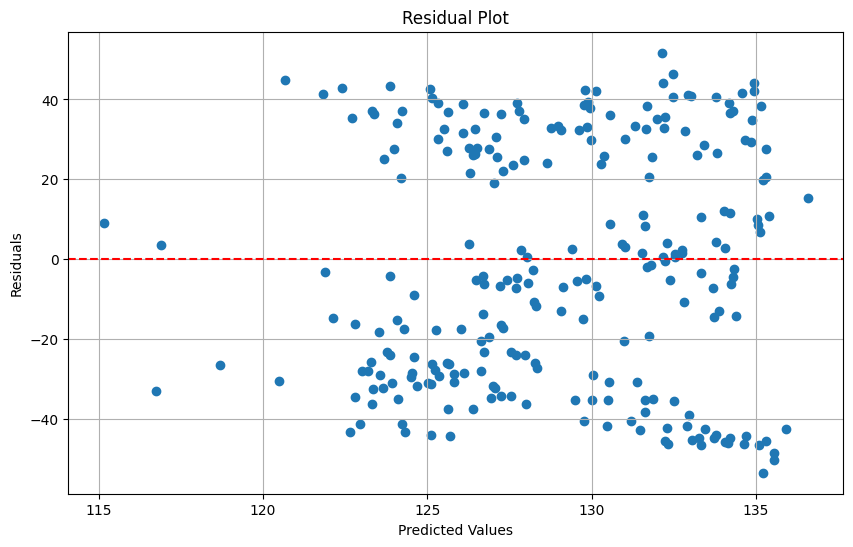

In [25]:
# Residual plot analysis
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.show()


14. **Feature Importance Analysis Based on Coefficients**

In [26]:
coefficients = model.coef_
feature_names = X_train.columns
coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

<Figure size 1000x600 with 0 Axes>

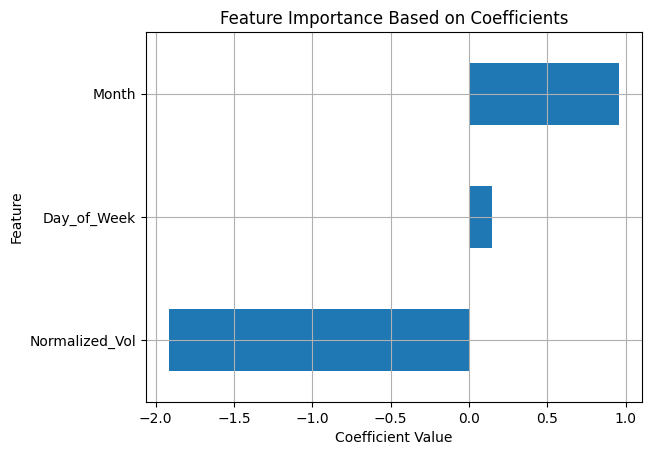

In [27]:
# Plot feature importance
plt.figure(figsize=(10, 6))
coef_df.set_index('Feature').sort_values(by='Coefficient').plot(kind='barh', legend=False)
plt.title('Feature Importance Based on Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.grid(True)
plt.show()

15. **Polynomial Features**

In [28]:
# Polynomial Features
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

16. **Training with Polynomial Features**

In [29]:
# Train with polynomial features
model_poly = LinearRegression()
model_poly.fit(X_poly_train, y_train)
y_pred_poly = model_poly.predict(X_poly_test)

mae_poly = mean_absolute_error(y_test, y_pred_poly)
rmse_poly = np.sqrt(mean_squared_error(y_test, y_pred_poly))
r2_poly = r2_score(y_test, y_pred_poly)

print(f"MAE with Polynomial Features: {mae_poly}")
print(f"RMSE with Polynomial Features: {rmse_poly}")
print(f"R-squared with Polynomial Features: {r2_poly}")

MAE with Polynomial Features: 26.414278684177578
RMSE with Polynomial Features: 30.218433399308328
R-squared with Polynomial Features: 0.016769328894893243
